<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68
5,6,41,M,450,0,Average experience,Books,86,West,Medium,2,13,NaN,3.238817,3,158.28
6,7,38,F,670,1,Prefers online shopping,Home Goods,69,North,Low,50,8,Winter Sale,2.738895,1,290.23
7,8,27,M,120,1,New customer,Home Goods,0,North,Low,6,3,Winter Sale,5.268858,7,181.40
8,9,50,F,500,0,Loyal to the brand,Electronics,86,East,Medium,20,14,Winter Sale,6.164246,3,296.54
9,10,33,M,750,1,High conversion rate,Clothing,45,South,Medium,72,1,NaN,6.775497,4,237.93


In [5]:
from sklearn.ensemble import RandomForestClassifier
X = df[['Age', 'Total Spent', 'Discount Availed', 'Customer Tenure (Years)']]
y = df['Converted']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)

                         Importance
Age                        0.488871
Total Spent                0.232515
Discount Availed           0.150336
Customer Tenure (Years)    0.128278


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd

scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age', 'Scaled_Discount_Availed', 'Scaled_Customer_Tenure']] = scaler.fit_transform(
    df[['Total_Spent', 'Age', 'Discount_Availed', 'Customer_Tenure (Years)']]
)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Scaled_Total_Spent', 'Scaled_Age', 'Discount Availed', 'Customer Tenure (Years)']])
df[['PCA1', 'PCA2']] = pca.result
print(df[['PCA1', 'PCA2']].head())

KeyError: "['Total_Spent', 'Discount_Availed', 'Customer_Tenure (Years)'] not in index"

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd

scaler = StandardScaler()

df[['Scaled_Total_Spent', 'Scaled_Age', 'Scaled_Discount_Availed', 'Scaled_Customer_Tenure']] = scaler.fit_transform(
    df[['Total Spent', 'Age', 'Discount Availed', 'Customer Tenure (Years)']]
)

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df[['Scaled_Total_Spent', 'Scaled_Age', 'Scaled_Discount_Availed', 'Scaled_Customer_Tenure']])
df[['PCA1', 'PCA2']] = pca_result
print(df[['PCA1', 'PCA2']].head())

       PCA1      PCA2
0 -2.147024 -0.133013
1  0.948959  0.557423
2  2.132313  0.669346
3  0.564108 -0.437356
4 -0.200507 -0.110023


In [10]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(random_state=42)
df['Outlier'] = iso_forest.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])
print(df[df['Outlier'] == -1])

KeyError: "None of [Index(['Scaled_Total_Spent', 'Scaled_Age'], dtype='object')] are in the [columns]"

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd


scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age', 'Scaled_Discount_Availed', 'Scaled_Customer_Tenure']] = scaler.fit_transform(
    df[['Total Spent', 'Age', 'Discount Availed', 'Customer Tenure (Years)']]
)


iso_forest = IsolationForest(random_state=42)
df['Outlier'] = iso_forest.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])


print(df[df['Outlier'] == -1])

    Customer ID  Age Gender  Total Spent  Converted  \
0             1   23      F          150          1   
2             3   45      F          800          0   
3             4   52      M          200          0   
7             8   27      M          120          1   
8             9   50      F          500          0   
9            10   33      M          750          1   
18           19   50      F          250          0   
19           20   25      F          400          1   

                      Comments Purchased Category  Stock Region Income Level  \
0   Satisfied with the service           Clothing      4   East       Medium   
2             Regular customer              Books     24  North       Medium   
3             Occasional buyer             Beauty     10   East       Medium   
7                 New customer         Home Goods      0  North          Low   
8           Loyal to the brand        Electronics     86   East       Medium   
9         High conversio

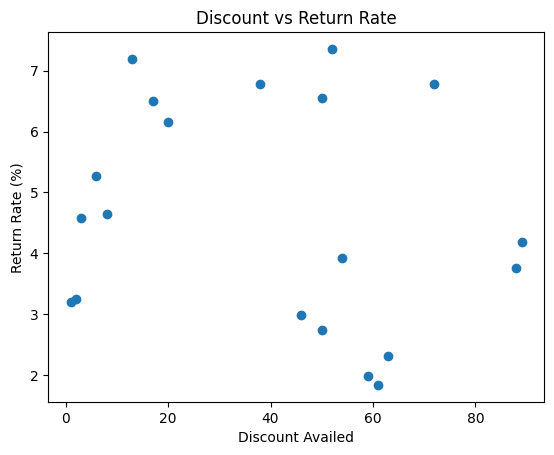

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['Discount Availed'], df['Return Rate (%)'])
plt.xlabel('Discount Availed')
plt.ylabel('Return Rate (%)')
plt.title('Discount vs Return Rate')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = df[['Age', 'Total Spent', 'Discount Availed', 'Customer Tenure (Years)']]
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8333333333333334
